# 📊 Business Sales Dashboard from E-Commerce Data  

This project focuses on analyzing e-commerce sales data to uncover business insights and present them using an **interactive Power BI dashboard**.  

### Objectives:
- Clean and prepare raw e-commerce sales data  
- Analyze sales performance across categories, products, and regions  
- Identify **best-selling products**, **top-performing categories**, and **sales trends**  
- Use **DAX measures** to calculate KPIs such as revenue, profit, and sales growth  
- Build a dashboard to support **business decision-making**  


## Data Cleaning & Preprocessing

#### First we'll import the necessary libraries

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
!pip install xlrd

#### Now we'll read the dataset

In [172]:
# Read Excel file
data = pd.read_excel("superstore.xls", engine="xlrd")

# Quick look at the dataset
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Best Selling and High-Revenue Products 

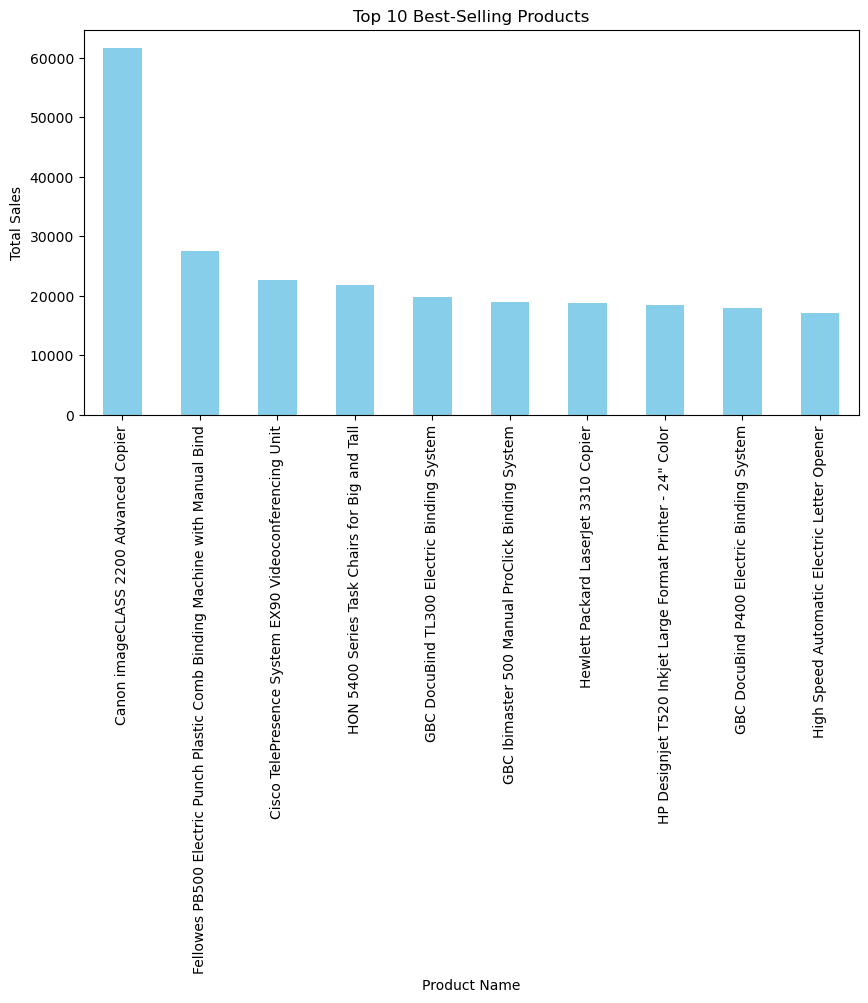

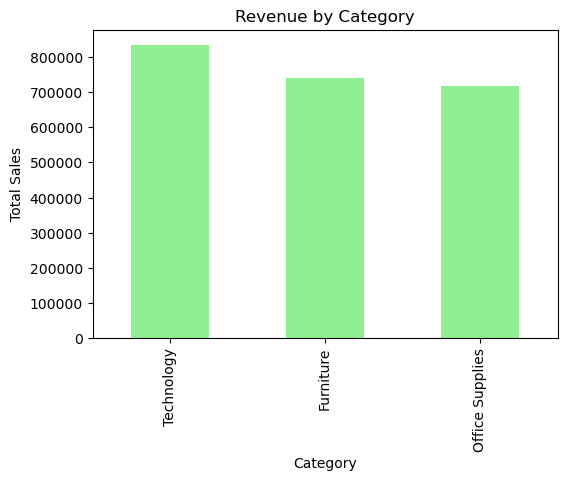

In [173]:
# Best-Selling Products
top_products = data.groupby("Product Name")["Sales"].sum().nlargest(10)
plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="skyblue",
                  title="Top 10 Best-Selling Products")
plt.ylabel("Total Sales") 
plt.show() 

# High-Revenue Categories 
top_categories = data.groupby("Category")["Sales"].sum().sort_values(ascending=False) 
plt.figure(figsize=(6,4)) 
top_categories.plot(kind="bar", color="lightgreen", 
                    title="Revenue by Category") 
plt.ylabel("Total Sales")
plt.show()

#### Let's check the dataset for any missing values

In [174]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### It seems like there are no missing values in our dataset, great

#### Let's see the description of the dataset to check for some statistics

In [175]:
data.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2013-04-30 19:20:02.401441024,2013-05-04 18:20:49.229537792,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2011-01-04 00:00:00,2011-01-08 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2012-05-23 00:00:00,2012-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2013-06-27 00:00:00,2013-06-30 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2014-05-15 00:00:00,2014-05-19 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2014-12-31 00:00:00,2015-01-06 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


#### Everything looks normal, let's take a look at the data itself

In [176]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


##### It seems that we need to change the index of our dataset to 'Order Date' because it'll make it easier in forecasting
##### But first we need to sort our data based on the 'Order Date' because it seems to be not sorted
##### to do that we'll first convert that column from a String type to a Datetime type, so it can be sorted properly

In [177]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

#### Now we sort it in ascending order

In [178]:
data.sort_values(by=['Order Date'], inplace=True, ascending=True)

#### And then we set the 'Order Date' column as an index as we said

In [179]:
data.set_index("Order Date", inplace = True)

#### After doing these modifications we'll notice that the 'Row ID' column became of no use, so let's drop it

In [180]:
data.drop('Row ID',axis = 1, inplace = True)

#### Now let's take a look again at our data

In [181]:
data.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,
2011-01-04,CA-2011-103800,2011-01-08,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2011-01-06,CA-2011-141817,2011-01-13,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


#### Let's extract Furniture Sales to a new dataframe and take a look at it

In [182]:
Furniture = data[data.Category == 'Furniture']
Furniture.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,
2011-01-07,CA-2011-167199,2011-01-11,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,Kentucky,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
2011-01-08,CA-2011-105417,2011-01-13,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
2011-01-11,CA-2011-149020,2011-01-16,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,Virginia,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
2011-01-12,CA-2011-130092,2011-01-15,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,Delaware,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
2011-01-14,CA-2011-109232,2011-01-17,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,South Carolina,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [183]:
furniture_monthly = Furniture['Sales'].resample('MS').sum()
furniture_monthly.head()

Order Date
2011-01-01     5951.859
2011-02-01     2130.324
2011-03-01    14573.956
2011-04-01     7944.837
2011-05-01     6912.787
Freq: MS, Name: Sales, dtype: float64

#### And the same for Office Supplies Sales

In [184]:
Office = data[data.Category == 'Office Supplies']
Office.head()

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Order Date,,,,,,,,,,,,,,,,,,,
2011-01-04,CA-2011-103800,2011-01-08,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
2011-01-05,CA-2011-112326,2011-01-09,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2011-01-06,CA-2011-141817,2011-01-13,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [185]:
office_monthly = Office['Sales'].resample('MS').sum()
office_monthly.head()

Order Date
2011-01-01     4851.080
2011-02-01     1071.724
2011-03-01     8605.879
2011-04-01    11155.074
2011-05-01     7135.624
Freq: MS, Name: Sales, dtype: float64

# Data Analysis

#### In this part we're going to take a look at Furniture sales and also Office Supplies sales

# Timestap

#### Now we'll sum the sales of each month, and use the start of each month as the timestamp

### Monthly Sales Aggregation

In [186]:
Furniture = Furniture.resample('MS')[Furniture.select_dtypes(include='number').columns].sum()
Office    = Office.resample('MS')[Office.select_dtypes(include='number').columns].sum()

print(Furniture.head())
print(Office.head())

            Postal Code      Sales  Quantity  Discount     Profit
Order Date                                                       
2011-01-01       967662   5951.859        68      2.55   802.0469
2011-02-01       556767   2130.324        25      0.95   124.1113
2011-03-01      1914913  14573.956       131      7.60 -1128.6550
2011-04-01      1702707   7944.837        81      3.45   554.3801
2011-05-01      1380475   6912.787        97      6.15  -349.8776
            Postal Code      Sales  Quantity  Discount     Profit
Order Date                                                       
2011-01-01      2881733   4851.080       169       6.7   788.9506
2011-02-01      2275214   1071.724       103       7.1   176.0910
2011-03-01      5255974   8605.879       370      15.4  1270.4133
2011-04-01      4529547  11155.074       345       8.8  1000.2086
2011-05-01      3314884   7135.624       281       9.2  1747.2044


In [187]:
Furniture = Furniture.resample('MS').sum()
Office = Office.resample('MS').sum()

#### Now let's take a look at our new monthly data

In [188]:
Furniture.head()

,Postal Code,Sales,Quantity,Discount,Profit
Order Date,,,,,
2011-01-01,967662,5951.859,68,2.55,802.0469
2011-02-01,556767,2130.324,25,0.95,124.1113
2011-03-01,1914913,14573.956,131,7.60,-1128.6550
2011-04-01,1702707,7944.837,81,3.45,554.3801
2011-05-01,1380475,6912.787,97,6.15,-349.8776


We can see that everything went well except one small problem, Postal Codes got summed, that happened because they are numbers, and we obviously don't need that, so let's drop the Postal Code column from both Furniture and Office Supplies data

In [189]:
del Furniture['Postal Code']
del Office['Postal Code']

#### Let's take a look again

In [190]:
Furniture.head()

,Sales,Quantity,Discount,Profit
Order Date,,,,
2011-01-01,5951.859,68,2.55,802.0469
2011-02-01,2130.324,25,0.95,124.1113
2011-03-01,14573.956,131,7.60,-1128.6550
2011-04-01,7944.837,81,3.45,554.3801
2011-05-01,6912.787,97,6.15,-349.8776


# Visualizations

#### Let's visualize the data of Furniture Sales by plotting the sales vs time

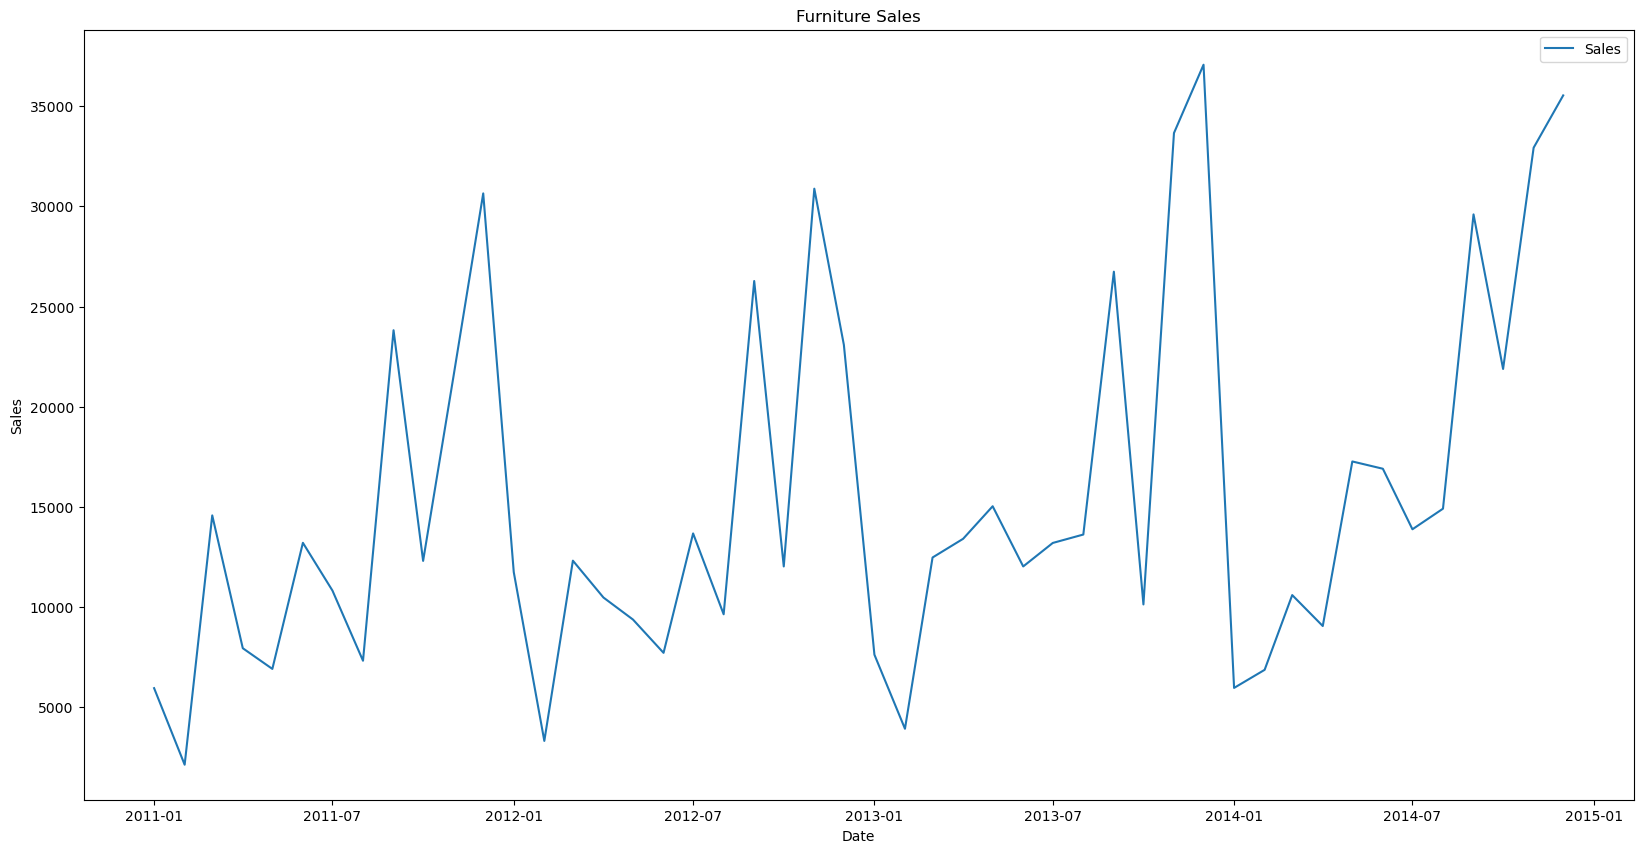

In [191]:
plt.figure(figsize=(20,10))
plt.plot(Furniture.index, Furniture['Sales'], label="Sales")
plt.legend()
plt.title("Furniture Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

Looks like our data has a Seasonal Pattern

#### Let's visualize the data of Office Supplies Sales also

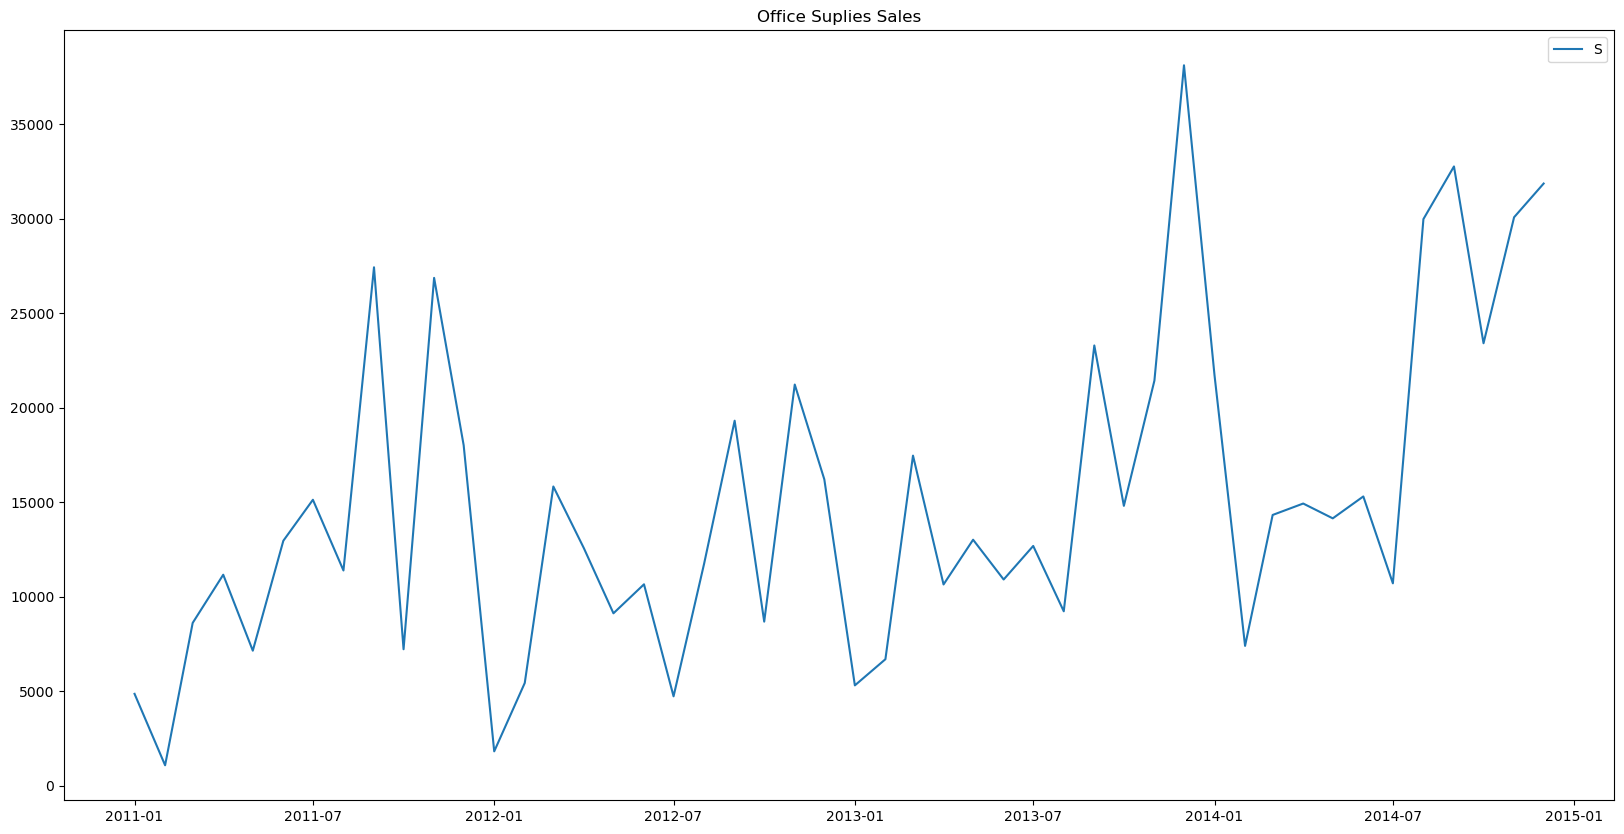

In [192]:
plt.plot(Office.index, Office.Sales, figure=figure(figsize=(20, 10)))
plt.legend(('Sales'))
plt.title("Office Suplies Sales")
plt.show()

#### Let's see both of them compared to each other

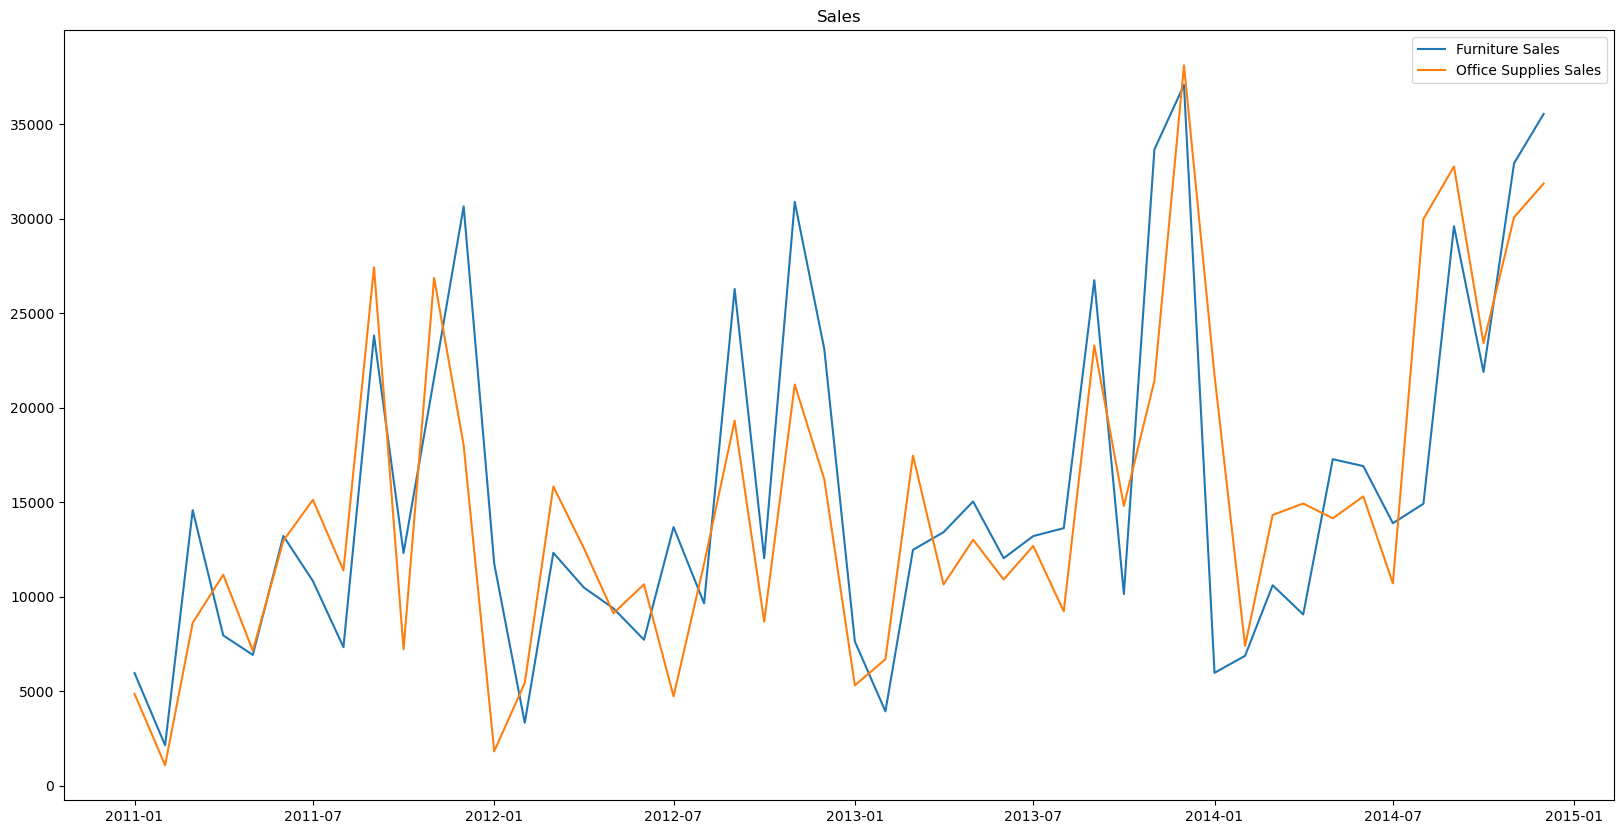

In [193]:
plt.figure(figsize=(20, 10))
plt.plot(Furniture.index, Furniture.Sales, label="Furniture Sales")
plt.plot(Office.index, Office.Sales, label="Office Supplies Sales")
plt.title("Sales")
plt.legend()
plt.show()


#### Some quick insights from this chart:

##### 1). Both categories follow a similar seasonal trend (spikes and dips align closely).

##### 2). Office Supplies sales often stay close to Furniture, sometimes even overtaking it.

##### 3). Around late 2013 to 2014, both categories peak sharply — likely due to annual business demand cycles.

# Forecasting

#### In this part we're going to predict the sales using 3 different ways

##### 1).4 Period Moving Average
##### 2).Exponential Smoothing Using alpha = 0.1
##### 3).Exponential Smoothing Using alpha = 0.5

First lets create an empty record for month next to the last of our dataset, becuase we're going to predict that month's sales

In [195]:
import numpy as np

# get next-month index
next_furniture_idx = Furniture.index[-1] + pd.DateOffset(months=1)
next_office_idx    = Office.index[-1] + pd.DateOffset(months=1)

# add an empty row with NaNs instead of None
Furniture.loc[next_furniture_idx] = [np.nan] * Furniture.shape[1]
Office.loc[next_office_idx]      = [np.nan] * Office.shape[1]


In [196]:
next_furniture_idx = Furniture.index[-1] + pd.DateOffset(months=1)
next_office_idx    = Office.index[-1] + pd.DateOffset(months=1)

In [198]:
import pandas as pd

# --- 1) compute next-month timestamps ---
next_furniture_idx = Furniture.index.max() + pd.DateOffset(months=1)
next_office_idx    = Office.index.max()    + pd.DateOffset(months=1)

# --- 2) append the index safely (creates NaN row) without warnings ---
Furniture = Furniture.reindex(Furniture.index.union(pd.DatetimeIndex([next_furniture_idx])))
Office    = Office.reindex(Office.index.union(pd.DatetimeIndex([next_office_idx])))

# Make sure Sales column is numeric
Furniture['Sales'] = pd.to_numeric(Furniture['Sales'], errors='coerce')
Office['Sales']    = pd.to_numeric(Office['Sales'], errors='coerce')

# --- 3) 4-period moving-average forecast (use shift so we don't include the new NaN row in the window) ---
furniture_forecast_series = Furniture['Sales'].shift(1).rolling(window=4, min_periods=1).mean()
office_forecast_series    = Office['Sales'].shift(1).rolling(window=4, min_periods=1).mean()

pred_furniture = furniture_forecast_series.loc[next_furniture_idx]
pred_office    = office_forecast_series.loc[next_office_idx]

# Fill forecast into the last row
Furniture.loc[next_furniture_idx, 'Sales'] = pred_furniture
Office.loc[next_office_idx, 'Sales']       = pred_office

print("Forecast inserted.")
print("Furniture next-month forecast:", pred_furniture)
print("Office next-month forecast   :", pred_office)

# quick check
print("\nFurniture tail:")
display(Furniture.tail(3))
print("\nOffice tail:")
display(Office.tail(3))


Forecast inserted.
Furniture next-month forecast: 34884.642850000004
Office next-month forecast   : 31408.363749999997

Furniture tail:


,Sales,Quantity,Discount,Profit
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,34232.09090,NaN,NaN,NaN
2015-04-01,34884.64285,NaN,NaN,NaN



Office tail:


,Sales,Quantity,Discount,Profit
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,30962.21950,NaN,NaN,NaN
2015-04-01,31408.36375,NaN,NaN,NaN


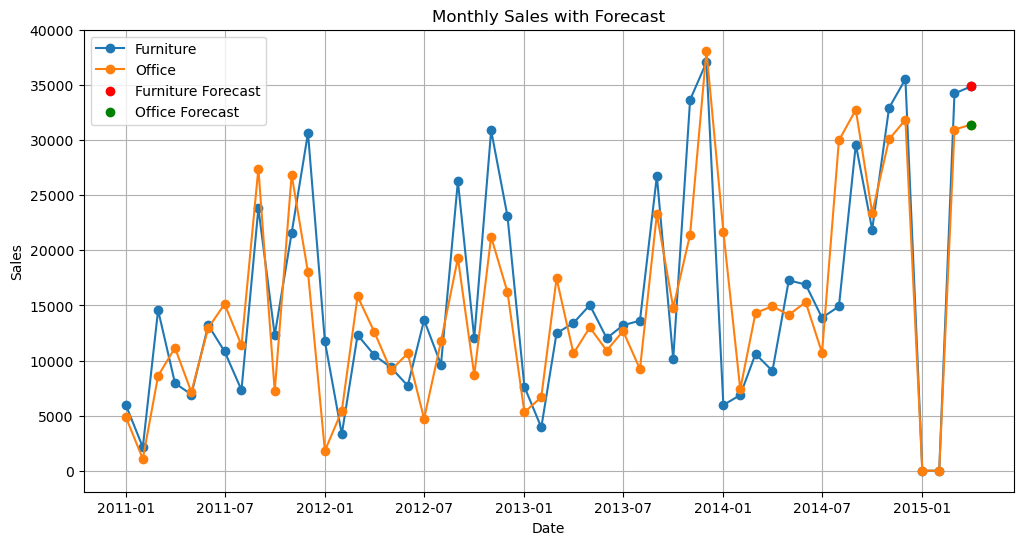

In [200]:
# Resample to monthly sales totals
plt.figure(figsize=(12,6))

plt.plot(furniture_monthly, label='Furniture', marker='o')
plt.plot(office_monthly, label='Office', marker='o')

# highlight the forecast point (last index)
plt.scatter(furniture_monthly.index[-1], furniture_monthly.iloc[-1], 
            color='red', label='Furniture Forecast', zorder=5)
plt.scatter(office_monthly.index[-1], office_monthly.iloc[-1], 
            color='green', label='Office Forecast', zorder=5)

plt.title("Monthly Sales with Forecast")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()



Let's check for that new row

In [201]:
Furniture.tail()

,Sales,Quantity,Discount,Profit
2014-12-01,35537.19480,415,19.12,749.9997
2015-01-01,NaN,None,NaN,NaN
2015-02-01,NaN,NaN,NaN,NaN
2015-03-01,34232.09090,NaN,NaN,NaN
2015-04-01,34884.64285,NaN,NaN,NaN


# 4 Period Moving Average

In statistics, a moving average is a calculation used to analyze data points by creating a series of averages of different subsets of the full data set.

We'll be using the average of the 4 previous months as the prediction for the current month

Let's start with Furniture Sales data

We'll use a rolling window of 4, calculate the mean, store in the newly created column

In [202]:
Furniture['MA4'] = Furniture['Sales'].shift(1).rolling(window=4).mean()

Now we'll shift the moving average column because each 4 months predict the next one which is the 5th not the 4th which is used in averaging

In [105]:
Furniture.MA4 = Furniture.MA4.shift(1)

Let's take a look at the data after generating the MA4 column

In [106]:
Furniture.head()

,Sales,Quantity,Discount,Profit,MA4
2011-01-01,5951.859,68,2.55,802.0469,NaN
2011-02-01,2130.324,25,0.95,124.1113,NaN
2011-03-01,14573.956,131,7.60,-1128.6550,NaN
2011-04-01,7944.837,81,3.45,554.3801,NaN
2011-05-01,6912.787,97,6.15,-349.8776,7650.244


In [107]:
Furniture = Furniture.dropna(how='all')

In [108]:
Furniture.tail()

,Sales,Quantity,Discount,Profit,MA4
2014-09-01,29597.7740,304,13.15,1555.8033,15740.204225
2014-10-01,21884.0682,252,13.32,-2526.9203,18822.922175
2014-11-01,32926.9870,343,15.59,802.8188,20068.207800
2014-12-01,35537.1948,415,19.12,749.9997,24829.523800
2015-01-01,NaN,None,NaN,NaN,29986.506000


#### Let's plot these predictions and compare them with actual values

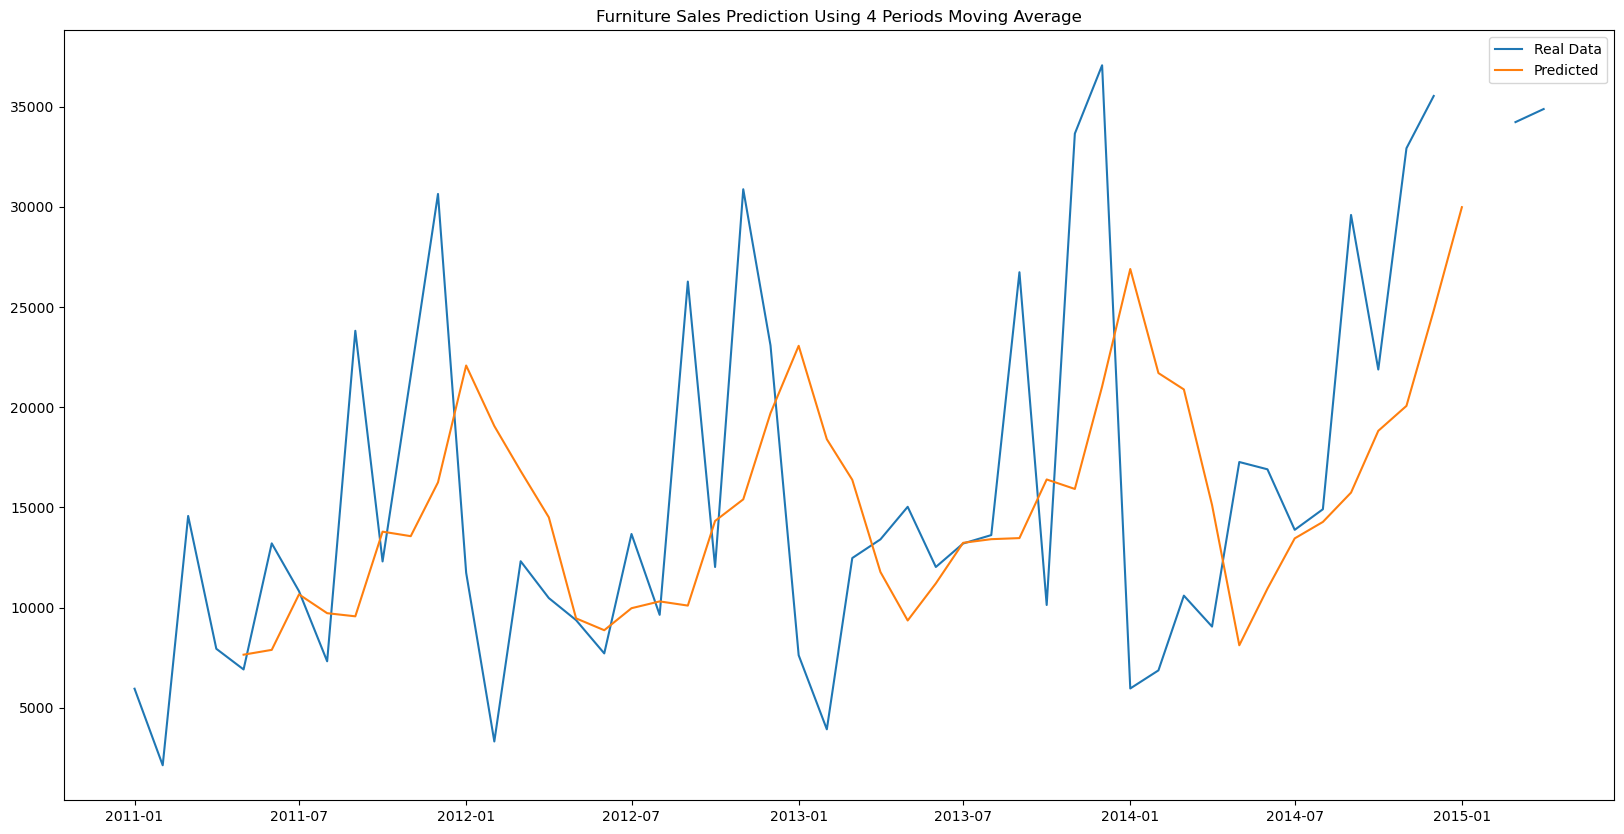

In [204]:
plt.figure(figsize=(20,10))
plt.plot(Furniture.index, Furniture['Sales'], label='Real Data')
plt.plot(Furniture.index, Furniture['MA4'], label='Predicted')
plt.legend()
plt.title("Furniture Sales Prediction Using 4 Periods Moving Average")
plt.show()

#### Now we'll do the exact same thing with Office Supplies Sales data

In [205]:
Office['MA4'] = Office.Sales.rolling(window=4).mean()

In [206]:
Office.MA4 = Office.MA4.shift(1)

In [207]:
Office.head()

,Sales,Quantity,Discount,Profit,MA4
2011-01-01,4851.080,169,6.7,788.9506,NaN
2011-02-01,1071.724,103,7.1,176.0910,NaN
2011-03-01,8605.879,370,15.4,1270.4133,NaN
2011-04-01,11155.074,345,8.8,1000.2086,NaN
2011-05-01,7135.624,281,9.2,1747.2044,6420.93925


In [208]:
Office = Office.dropna(how='all')

In [209]:
Office.tail()

,Sales,Quantity,Discount,Profit,MA4
2014-11-01,30069.93100,1071,44.0,3410.2510,24208.48175
2014-12-01,31854.50800,1088,41.2,1976.9769,29051.23350
2015-01-01,NaN,None,NaN,NaN,29521.56700
2015-03-01,30962.21950,NaN,NaN,NaN,NaN
2015-04-01,31408.36375,NaN,NaN,NaN,NaN


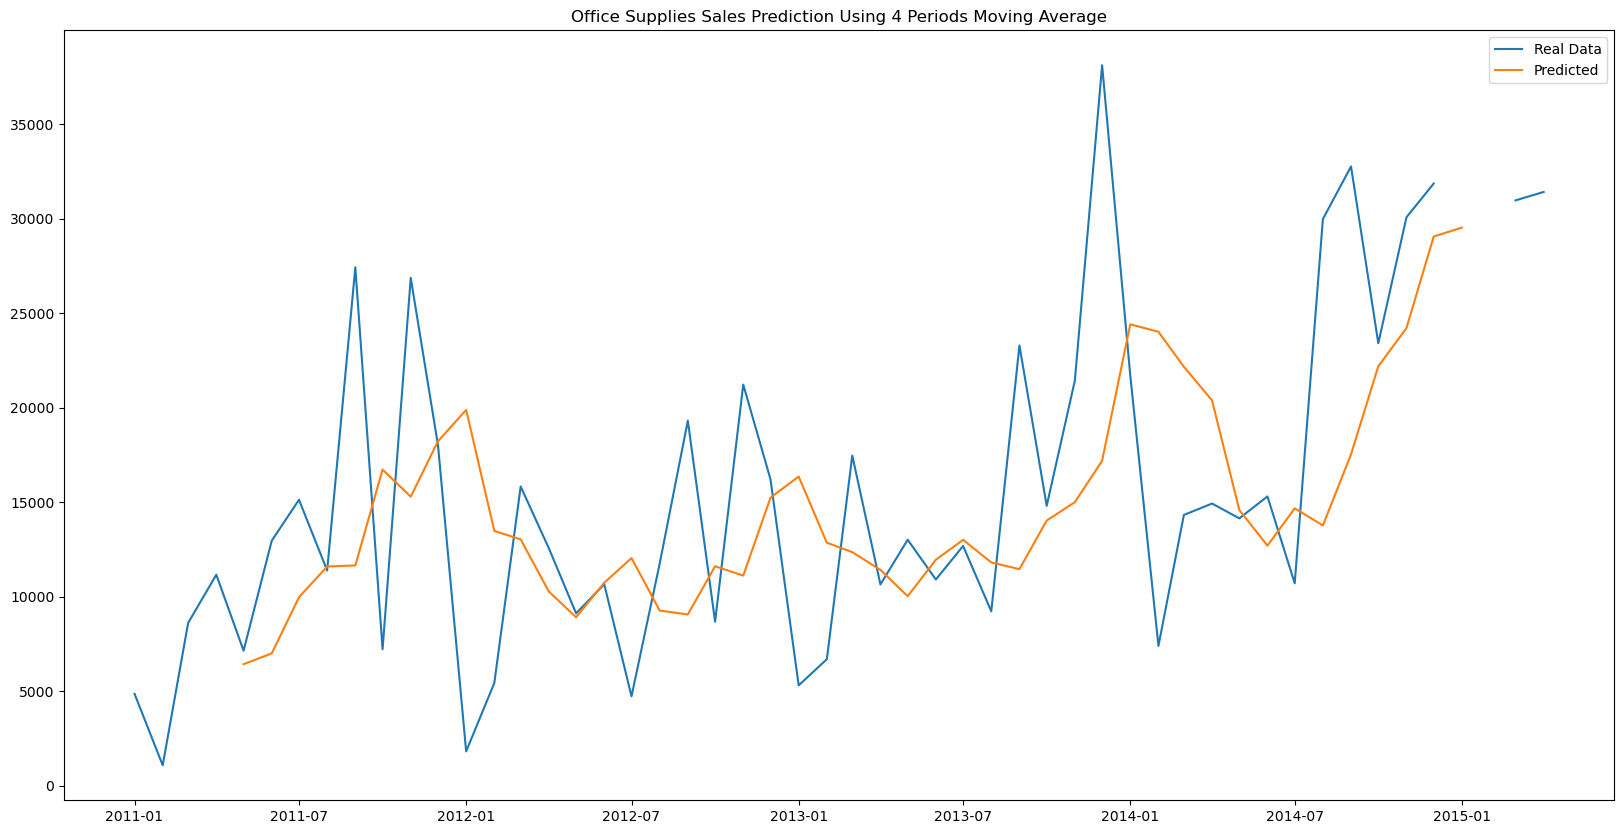

In [210]:
plt.plot(Office.index,Office.Sales,Office.MA4,figure=figure(figsize=(20, 10)))
plt.legend(('Real Data', 'Predicted'))
plt.title("Office Supplies Sales Prediction Using 4 Periods Moving Average")
plt.show()

# Exponential Smoothing

Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time.

We'll apply exponential smoothing using different alpha values

1). alpha = 0.1

2). alpha = 0.5

#### Let's start with the Furniture Sales data¶

First we'll create 2 empty columns to store the predicted values

1). ES1 = predicted value for the exponential smoothing when alpha = 0.1

2). ES5 = predicted value for the exponential smoothing when alpha = 0.5

In [212]:
# make a true copy once, then add columns
Furniture = Furniture.copy()

Furniture.loc[:, 'ES1'] = np.nan
Furniture.loc[:, 'ES5'] = np.nan

In [216]:
Furniture['ES1'] = np.nan
Furniture['ES5'] = np.nan

#### Now let's calculate the values using the EWM function

In [217]:
Furniture['ES1']= Furniture.Sales.ewm(alpha=0.1, adjust=False).mean()
Furniture['ES5']= Furniture.Sales.ewm(alpha=0.5, adjust=False).mean()

#### Now we'll shift the 2 columns each months predict the next one not itself

In [218]:
Furniture.ES1 = Furniture.ES1.shift(1)
Furniture.ES5 = Furniture.ES5.shift(1)

#### We'll set the first months prediction the same as the real value (it's called initial value in the exponential smoothing)

In [219]:
Furniture.ES1.iat[0] = Furniture.Sales.iat[0]
Furniture.ES5.iat[0] = Furniture.Sales.iat[0]

#### Now let's take a look at the data with the newly created 2 columns

In [220]:
Furniture.head()

,Sales,Quantity,Discount,Profit,MA4,ES1,ES5
2011-01-01,5951.859,68,2.55,802.0469,NaN,5951.859000,5951.859000
2011-02-01,2130.324,25,0.95,124.1113,NaN,5951.859000,5951.859000
2011-03-01,14573.956,131,7.60,-1128.6550,NaN,5569.705500,4041.091500
2011-04-01,7944.837,81,3.45,554.3801,NaN,6470.130550,9307.523750
2011-05-01,6912.787,97,6.15,-349.8776,7650.244,6617.601195,8626.180375


In [221]:
Furniture.tail()

,Sales,Quantity,Discount,Profit,MA4,ES1,ES5
2014-12-01,35537.19480,415,19.12,749.9997,24829.5238,18676.007741,27479.548334
2015-01-01,NaN,None,NaN,NaN,29986.5060,20362.126447,31508.371567
2015-02-01,NaN,NaN,NaN,NaN,NaN,20362.126447,31508.371567
2015-03-01,34232.09090,NaN,NaN,NaN,NaN,20362.126447,31508.371567
2015-04-01,34884.64285,NaN,NaN,NaN,NaN,22035.222279,33687.347033


#### Let's plot ES1 vs the real data and see how it looks

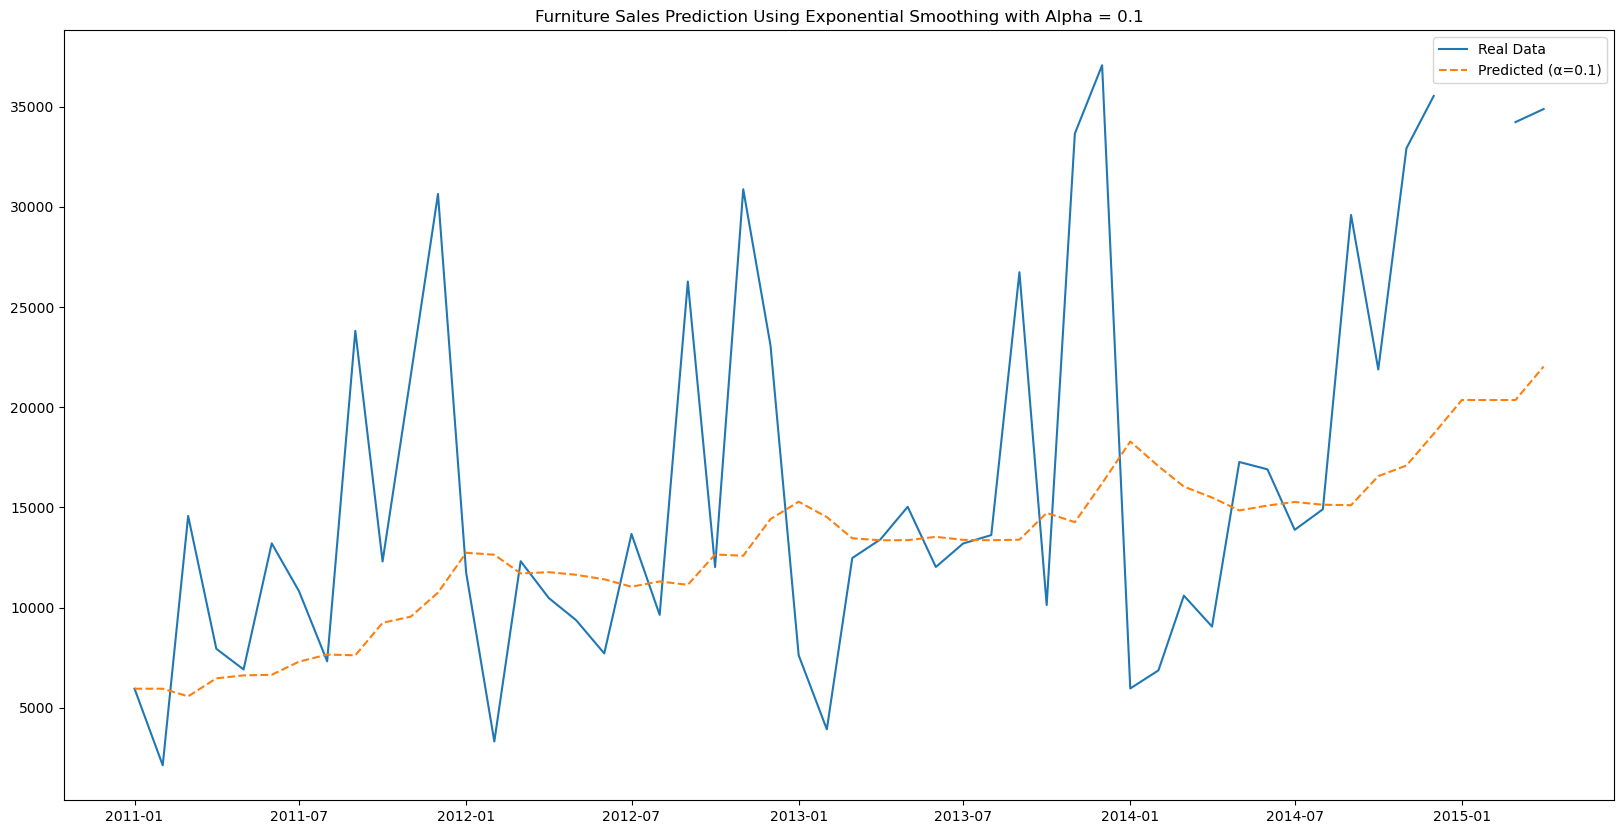

In [223]:
plt.figure(figsize=(20, 10))
plt.plot(Furniture.index, Furniture.Sales, label='Real Data')
plt.plot(Furniture.index, Furniture.ES1, label='Predicted (α=0.1)', linestyle='--')
plt.legend()
plt.title("Furniture Sales Prediction Using Exponential Smoothing with Alpha = 0.1")
plt.show()


The predicted data seems alot far from the real one

#### Let's plot ES5 vs the real data and see how it looks

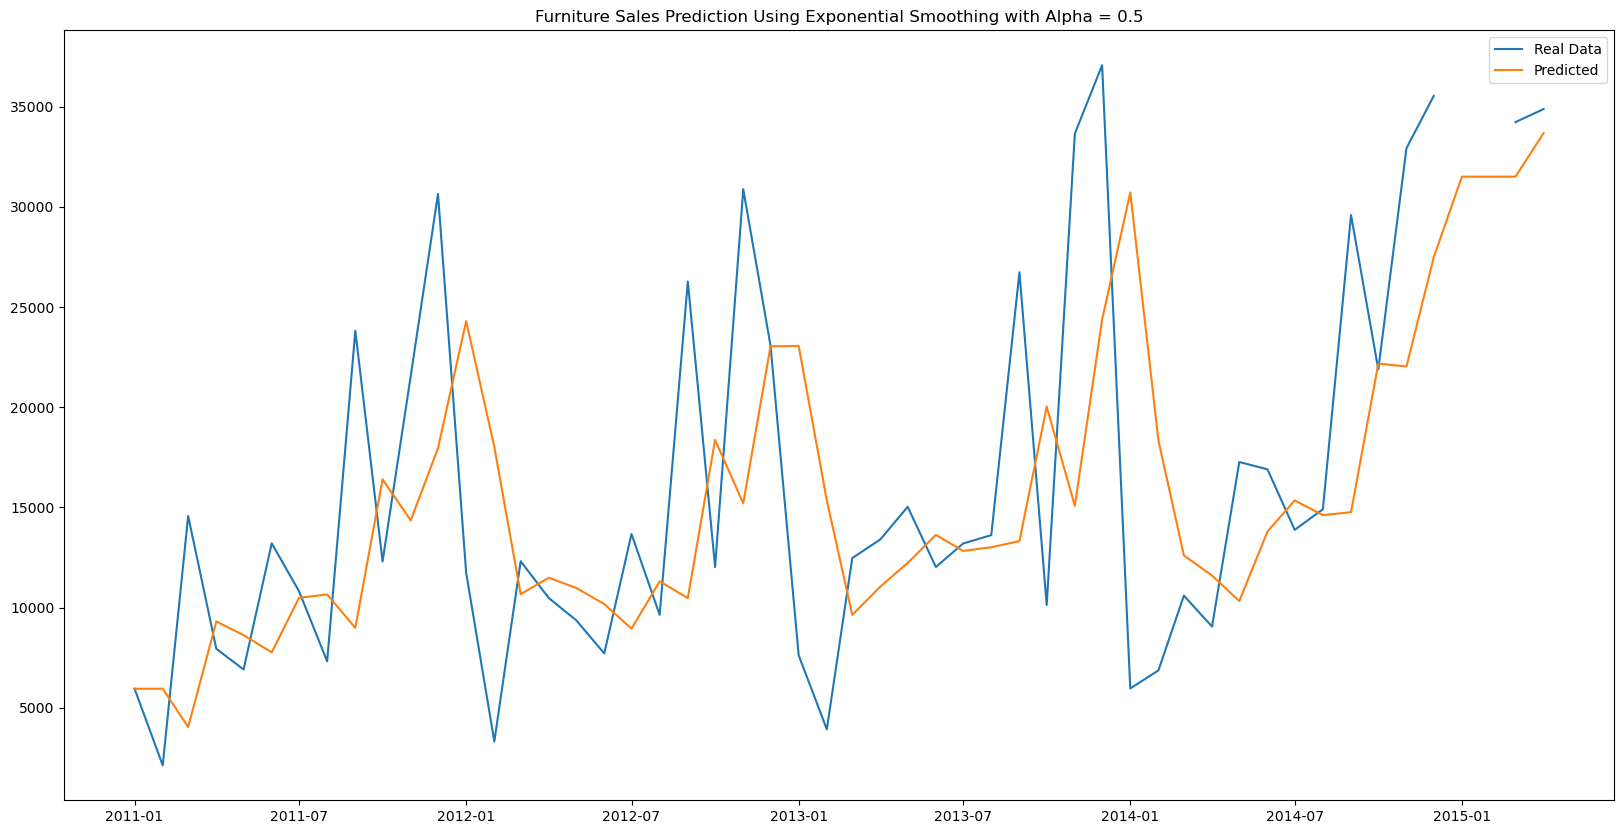

In [224]:
plt.plot(Furniture.index,Furniture.Sales,Furniture.ES5,figure=figure(figsize=(20, 10)))
plt.legend(('Real Data', 'Predicted'))
plt.title("Furniture Sales Prediction Using Exponential Smoothing with Alpha = 0.5")
plt.show()

Alpha = 0.5 seems to give better results with predictions close to the real data

#### Let's see the 2 together with the real data

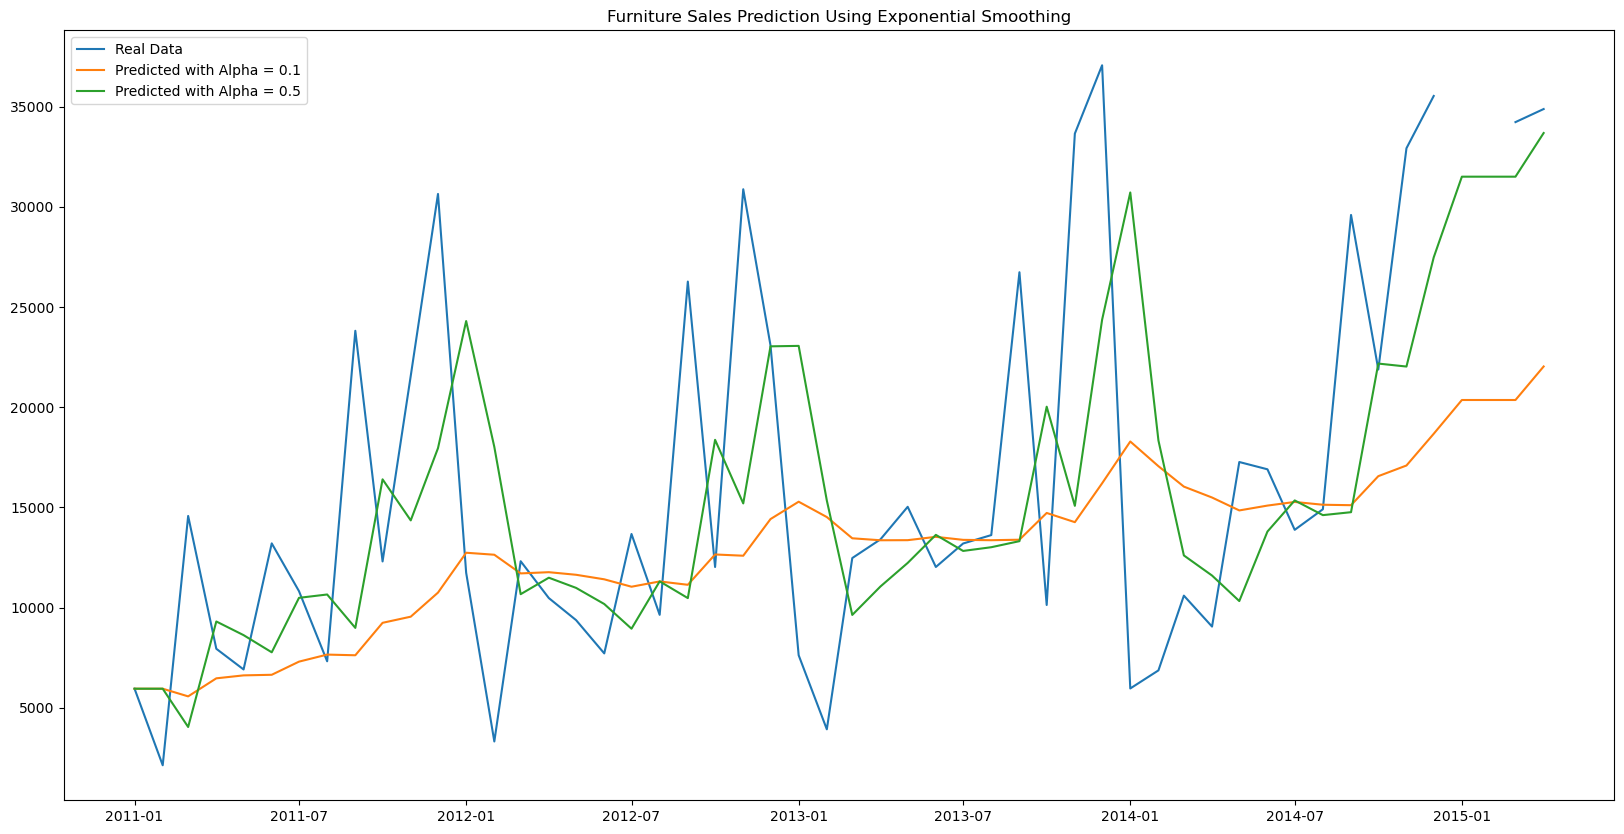

In [226]:
plt.figure(figsize=(20, 10))

plt.plot(Furniture.index, Furniture.Sales)
plt.plot(Furniture.index, Furniture.ES1)
plt.plot(Furniture.index, Furniture.ES5)

plt.legend(('Real Data', 'Predicted with Alpha = 0.1', 'Predicted with Alpha = 0.5'))
plt.title("Furniture Sales Prediction Using Exponential Smoothing")
plt.show()


it looks clearly that Exponential Smoothing with Alpha = 0.5 gives better results compared to Alpha = 0.1

#### Now we'll do the exact same with Office Supplies Sales data

In [227]:
Office['ES1'] = np.nan
Office['ES5'] = np.nan

In [228]:
Office['ES1']= Office.Sales.ewm(alpha=0.1, adjust=False).mean()
Office['ES5']= Office.Sales.ewm(alpha=0.5, adjust=False).mean()

In [229]:
Office.ES1 = Office.ES1.shift(1)
Office.ES5 = Office.ES5.shift(1)

In [230]:
Office.ES1.iat[0] = Office.Sales.iat[0]
Office.ES5.iat[0] = Office.Sales.iat[0]

In [231]:
Office.head()

,Sales,Quantity,Discount,Profit,MA4,ES1,ES5
2011-01-01,4851.080,169,6.7,788.9506,NaN,4851.080000,4851.08000
2011-02-01,1071.724,103,7.1,176.0910,NaN,4851.080000,4851.08000
2011-03-01,8605.879,370,15.4,1270.4133,NaN,4473.144400,2961.40200
2011-04-01,11155.074,345,8.8,1000.2086,NaN,4886.417860,5783.64050
2011-05-01,7135.624,281,9.2,1747.2044,6420.93925,5513.283474,8469.35725


In [232]:
Office.tail()

,Sales,Quantity,Discount,Profit,MA4,ES1,ES5
2014-11-01,30069.93100,1071,44.0,3410.2510,24208.48175,18632.972611,25241.288374
2014-12-01,31854.50800,1088,41.2,1976.9769,29051.23350,19776.668450,27655.609687
2015-01-01,NaN,None,NaN,NaN,29521.56700,20984.452405,29755.058844
2015-03-01,30962.21950,NaN,NaN,NaN,NaN,20984.452405,29755.058844
2015-04-01,31408.36375,NaN,NaN,NaN,NaN,22080.910327,30559.832615


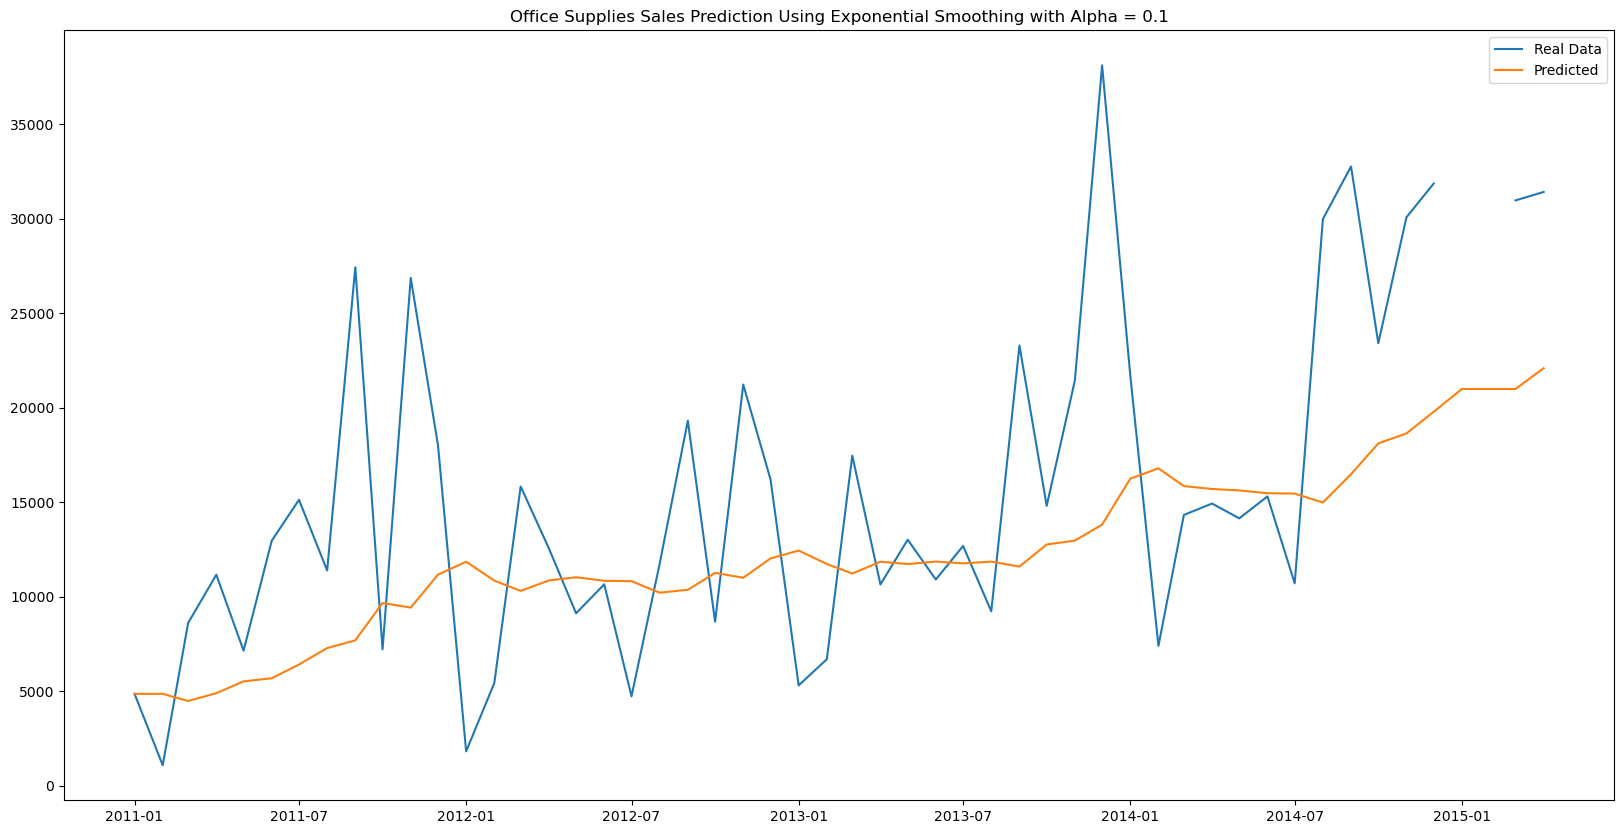

In [235]:
plt.plot(Office.index, Office.Sales, Office.index, Office.ES1, figure=figure(figsize=(20, 10)))
plt.legend(('Real Data', 'Predicted'))   # manually add labels
plt.title("Office Supplies Sales Prediction Using Exponential Smoothing with Alpha = 0.1")
plt.show()

The predicted data seems alot far from the real one

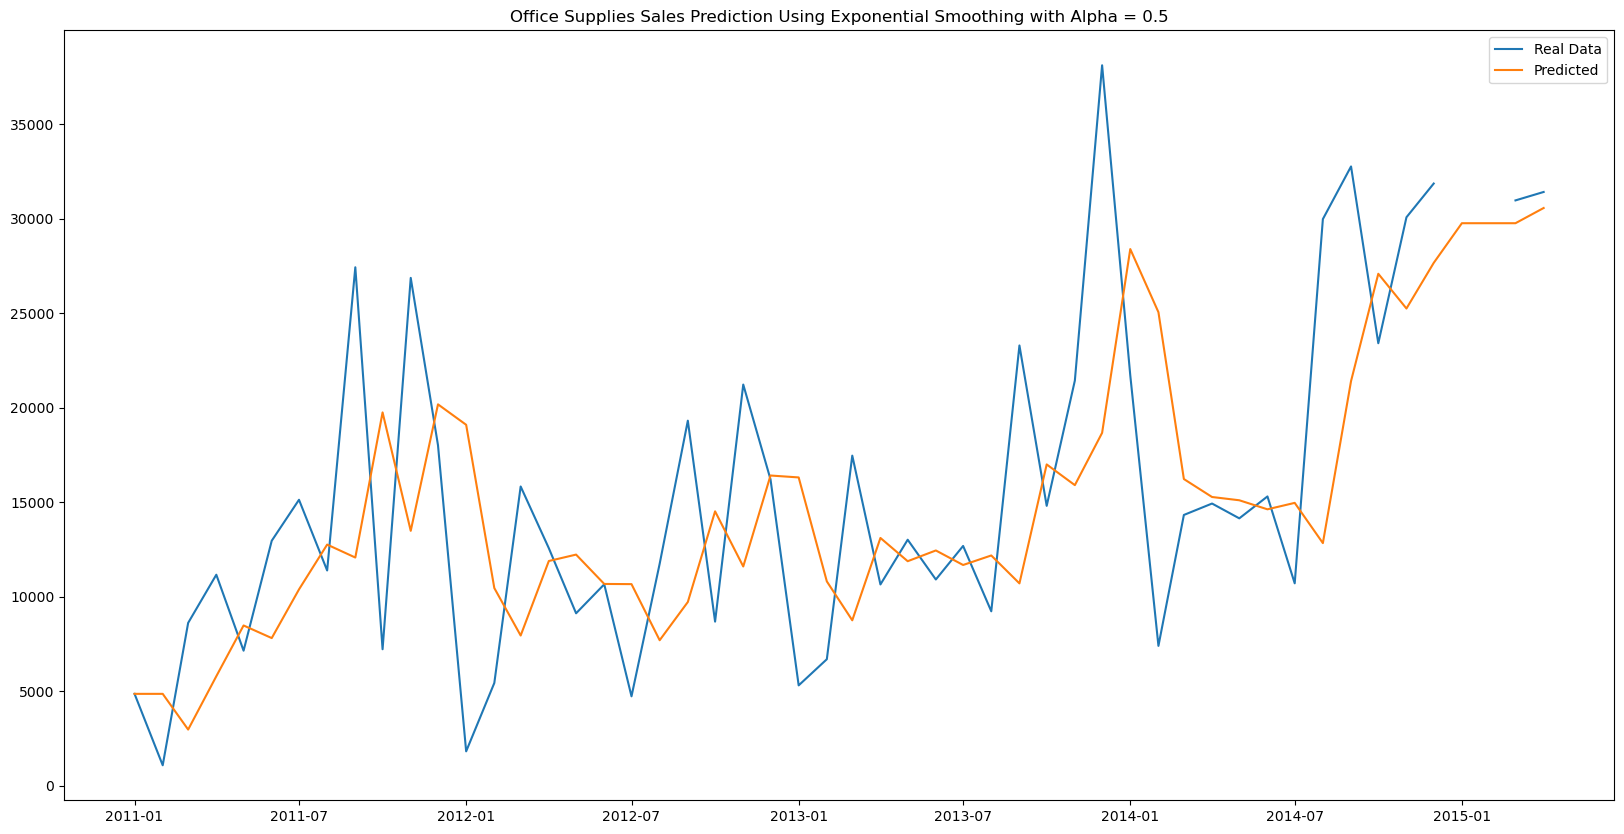

In [236]:
plt.plot(Office.index,Office.Sales,Office.ES5,figure=figure(figsize=(20, 10)))
plt.legend(('Real Data', 'Predicted'))
plt.title("Office Supplies Sales Prediction Using Exponential Smoothing with Alpha = 0.5")
plt.show()

Alpha = 0.5 seems to give better results with predictions close to the real data

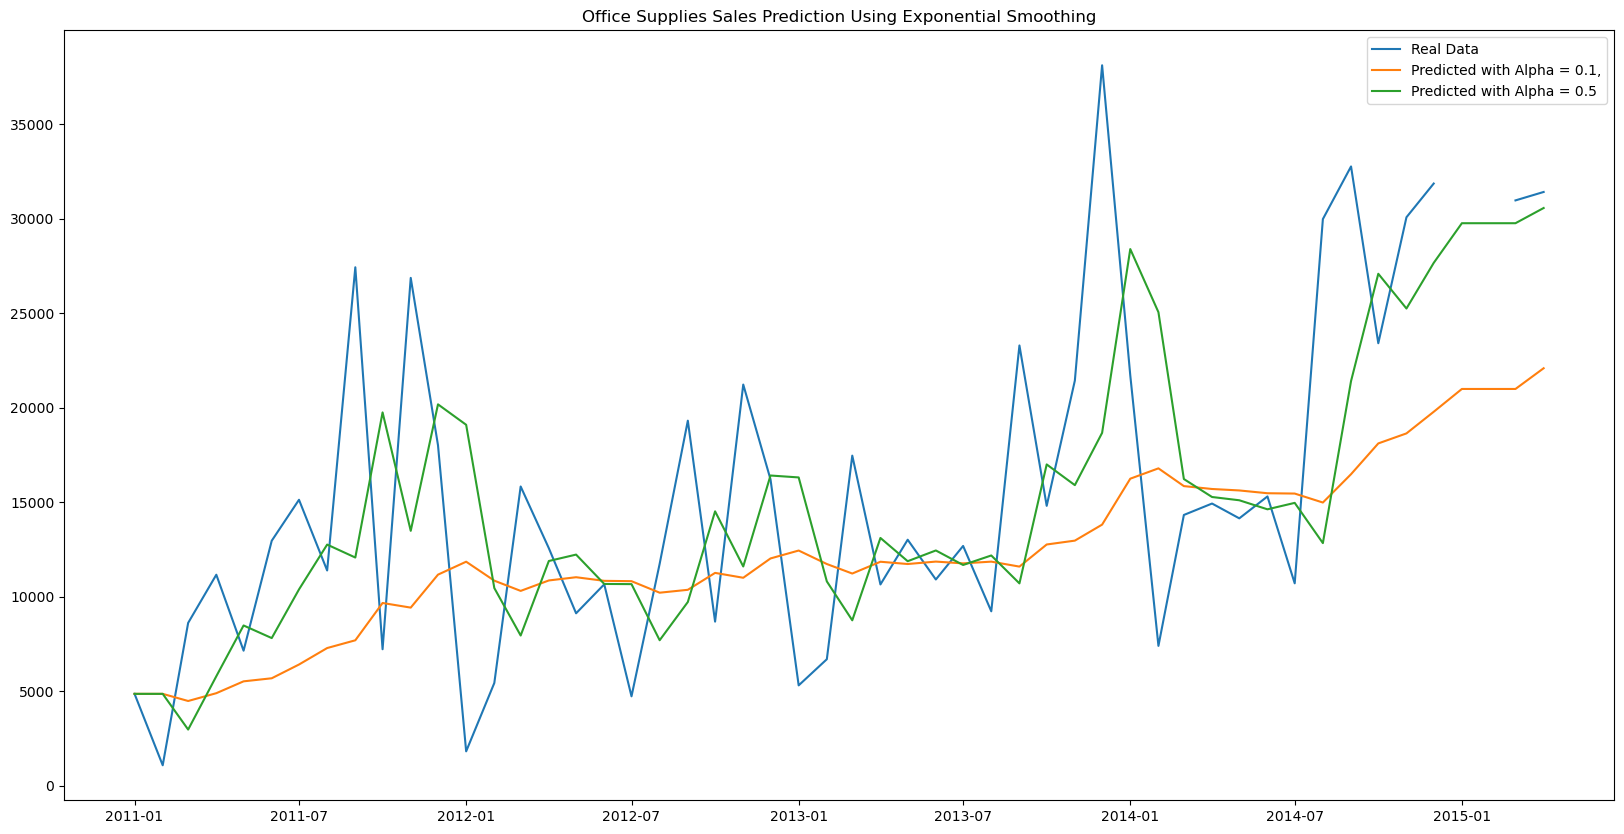

In [237]:
plt.plot(Office.index,Office.Sales,Office.index,Office.ES1,Office.index,Office.ES5,figure=figure(figsize=(20, 10)))
plt.legend(('Real Data', 'Predicted with Alpha = 0.1', 'Predicted with Alpha = 0.5'))
plt.title("Office Supplies Sales Prediction Using Exponential Smoothing")
plt.show()

it looks clearly that Exponential Smoothing with Alpha = 0.5 gives better results compared to Alpha = 0.1

#### Next Month Forecast (For All Next Months)

In [135]:
print("Next Months Forecasts for Furniture Sales Will be :")
print("    - Using 4 Periods Moving Average = ", Furniture.MA4.values[-1])
print("    - Using Exponential Smoothing With a = 0.1 = ", Furniture.ES1.values[-1])
print("    - Using Exponential Smoothing With a = 0.5 = ", Furniture.ES5.values[-1])

Next Months Forecasts for Furniture Sales Will be :
    - Using 4 Periods Moving Average =  29986.506
    - Using Exponential Smoothing With a = 0.1 =  20362.126446697854
    - Using Exponential Smoothing With a = 0.5 =  31508.371566933667


In [238]:
print("Next Months Forecasts for Office Supplies Sales Will be :")
print("    - Using 4 Periods Moving Average = ", Office.MA4.values[-1])
print("    - Using Exponential Smoothing With a = 0.1 = ", Office.ES1.values[-1])
print("    - Using Exponential Smoothing With a = 0.5 = ", Office.ES5.values[-1])

Next Months Forecasts for Office Supplies Sales Will be :
    - Using 4 Periods Moving Average =  nan
    - Using Exponential Smoothing With a = 0.1 =  22080.91032716176
    - Using Exponential Smoothing With a = 0.5 =  30559.832614522544


# Forecasts Results Comparison

## Furniture Forecast Results

#### Mean Squred Error (MSE)

In [241]:
print("Mean Squared Error for Furniture Forecasts :")
print("    - For 4 Periods Moving Average MSE = ", ((Furniture.MA4 - Furniture.Sales)**2).dropna().mean())
print("    - For Exponential Smoothing With a = 0.1 MSE = ", ((Furniture.ES1 - Furniture.Sales)**2).dropna().mean())
print("    - For Exponential Smoothing With a = 0.5 MSE = ", ((Furniture.ES5 - Furniture.Sales)**2).dropna().mean())

Mean Squared Error for Furniture Forecasts :
    - For 4 Periods Moving Average MSE =  93731008.71297003
    - For Exponential Smoothing With a = 0.1 MSE =  87590802.82973413
    - For Exponential Smoothing With a = 0.5 MSE =  79473194.41334426


### Mean Absolute Percentage Error (MAPE)

In [243]:
print("Mean Absolute Percentage Error (MAPE) for Furniture Forecasts :")
print("    - For 4 Periods Moving Average MAPE = ",
      (abs((Furniture.Sales - Furniture.MA4) / Furniture.Sales)).dropna().mean() * 100)
print("    - For Exponential Smoothing With a = 0.1 MAPE = ",
      (abs((Furniture.Sales - Furniture.ES1) / Furniture.Sales)).dropna().mean() * 100)
print("    - For Exponential Smoothing With a = 0.5 MAPE = ",
      (abs((Furniture.Sales - Furniture.ES5) / Furniture.Sales)).dropna().mean() * 100)

Mean Absolute Percentage Error (MAPE) for Furniture Forecasts :
    - For 4 Periods Moving Average MAPE =  65.89957620320394
    - For Exponential Smoothing With a = 0.1 MAPE =  50.2749267100755
    - For Exponential Smoothing With a = 0.5 MAPE =  60.42084708629054


### Least Absolute Deviations (LAD)

In [244]:
print("Least Absolute Deviations (LAD) for Furniture Forecasts :")
print("    - For 4 Periods Moving Average LAD = ", abs(Furniture.MA4 - Furniture.Sales).mean())
print("    - For Exponential Smoothing With a = 0.1 LAD = ", abs(Furniture.ES1 - Furniture.Sales).mean())
print("    - For Exponential Smoothing With a = 0.5 LAD = ", abs(Furniture.ES5 - Furniture.Sales).mean())

Least Absolute Deviations (LAD) for Furniture Forecasts :
    - For 4 Periods Moving Average LAD =  7468.0863329545455
    - For Exponential Smoothing With a = 0.1 LAD =  6838.932633324269
    - For Exponential Smoothing With a = 0.5 LAD =  6525.161312424895


### Mean Absolute Deviations (MAD)

In [245]:
print("Mean Absolute Deviations for Furniture Forecasts :")
print("    - For 4 Periods Moving Average MAD = ", abs(Furniture.MA4 - Furniture.Sales).mean())
print("    - For Exponential Smoothing With a = 0.1 MAD = ", abs(Furniture.ES1 - Furniture.Sales).mean())
print("    - For Exponential Smoothing With a = 0.5 MAD = ", abs(Furniture.ES5 - Furniture.Sales).mean())

Mean Absolute Deviations for Furniture Forecasts :
    - For 4 Periods Moving Average MAD =  7468.0863329545455
    - For Exponential Smoothing With a = 0.1 MAD =  6838.932633324269
    - For Exponential Smoothing With a = 0.5 MAD =  6525.161312424895


# Office Supplies Forecast Results

### Mean Squred Error (MSE)

In [141]:
print("Mean Squared Error for Office Supplies Forecasts :")
print("    - For 4 Periods Moving Average MSE = ", ((Office.MA4 - Office.Sales)**2).mean())
print("    - For Exponential Smoothing With a = 0.1 MSE = ", ((Office.ES1 - Office.Sales)**2).mean())
print("    - For Exponential Smoothing With a = 0.5 MSE = ", ((Office.ES5 - Office.Sales)**2).mean())

Mean Squared Error for Office Supplies Forecasts :
    - For 4 Periods Moving Average MSE =  67649102.25487319
    - For Exponential Smoothing With a = 0.1 MSE =  67764630.90675609
    - For Exponential Smoothing With a = 0.5 MSE =  63203342.99943862


### Mean Absolute Percentage Error (MAPE)

In [247]:
import numpy as np

print("Mean Absolute Percentage Error for Office Supplies Forecasts :")
print("    - For 4 Periods Moving Average MAPE = ", 
      np.mean(np.abs((Office.MA4 - Office.Sales) / Office.Sales.replace(0, np.nan))))
print("    - For Exponential Smoothing With a = 0.1 MAPE = ", 
      np.mean(np.abs((Office.ES1 - Office.Sales) / Office.Sales.replace(0, np.nan))))
print("    - For Exponential Smoothing With a = 0.5 MAPE = ", 
      np.mean(np.abs((Office.ES5 - Office.Sales) / Office.Sales.replace(0, np.nan))))


Mean Absolute Percentage Error for Office Supplies Forecasts :
    - For 4 Periods Moving Average MAPE =  0.6567946110041573
    - For Exponential Smoothing With a = 0.1 MAPE =  0.5639020261657586
    - For Exponential Smoothing With a = 0.5 MAPE =  0.6703375359318704


### Least Absolute Deviations (LAD)

In [143]:
print("Least Absolute Deviations for Office Supplies Forecasts :")
print("    - For 4 Periods Moving Average LAD = ", abs(Office.MA4 - Office.Sales).max())
print("    - For Exponential Smoothing With a = 0.1 LAD = ", abs(Office.ES1 - Office.Sales).max())
print("    - For Exponential Smoothing With a = 0.5 LAD = ", abs(Office.ES5 - Office.Sales).max())

Least Absolute Deviations for Office Supplies Forecasts :
    - For 4 Periods Moving Average LAD =  20929.2265
    - For Exponential Smoothing With a = 0.1 LAD =  24306.18003995273
    - For Exponential Smoothing With a = 0.5 LAD =  19450.61549394146


### Mean Absolute Deviations (MAD)

In [144]:
print("Mean Absolute Deviations for Office Supplies Forecasts :")
print("    - For 4 Periods Moving Average MAD = ", abs(Office.MA4 - Office.Sales).mean())
print("    - For Exponential Smoothing With a = 0.1 MAD = ", abs(Office.ES1 - Office.Sales).mean())
print("    - For Exponential Smoothing With a = 0.5 MAD = ", abs(Office.ES5 - Office.Sales).mean())

Mean Absolute Deviations for Office Supplies Forecasts :
    - For 4 Periods Moving Average MAD =  6037.457767045455
    - For Exponential Smoothing With a = 0.1 MAD =  6172.695967493554
    - For Exponential Smoothing With a = 0.5 MAD =  5967.769765392663


# 📊 Forecast Evaluation & Business Insights
In this section, we summarize forecast performance and provide actionable business recommendations.


In [145]:
import pandas as pd

# Summary dictionary
forecast_summary = {
    'Category': ['Furniture', 'Furniture', 'Furniture', 'Office Supplies', 'Office Supplies', 'Office Supplies'],
    'Method': ['4-Period MA', 'ES α=0.1', 'ES α=0.5', '4-Period MA', 'ES α=0.1', 'ES α=0.5'],
    'MSE': [
        ((Furniture.MA4 - Furniture.Sales)**2).mean(),
        ((Furniture.ES1 - Furniture.Sales)**2).mean(),
        ((Furniture.ES5 - Furniture.Sales)**2).mean(),
        ((Office.MA4 - Office.Sales)**2).mean(),
        ((Office.ES1 - Office.Sales)**2).mean(),
        ((Office.ES5 - Office.Sales)**2).mean()
    ],
    'MAPE (%)': [
        (abs(Furniture.MA4 - Furniture.Sales)/Furniture.Sales).mean() * 100,
        (abs(Furniture.ES1 - Furniture.Sales)/Furniture.Sales).mean() * 100,
        (abs(Furniture.ES5 - Furniture.Sales)/Furniture.Sales).mean() * 100,
        (abs(Office.MA4 - Office.Sales)/Office.Sales).mean() * 100,
        (abs(Office.ES1 - Office.Sales)/Office.Sales).mean() * 100,
        (abs(Office.ES5 - Office.Sales)/Office.Sales).mean() * 100
    ],
    'MAD': [
        (abs(Furniture.MA4 - Furniture.Sales)).mean(),
        (abs(Furniture.ES1 - Furniture.Sales)).mean(),
        (abs(Furniture.ES5 - Furniture.Sales)).mean(),
        (abs(Office.MA4 - Office.Sales)).mean(),
        (abs(Office.ES1 - Office.Sales)).mean(),
        (abs(Office.ES5 - Office.Sales)).mean()
    ]
}

# Convert to DataFrame
forecast_summary_df = pd.DataFrame(forecast_summary)

# Display table
forecast_summary_df


,Category,Method,MSE,MAPE (%),MAD
0,Furniture,4-Period MA,9.373101e+07,65.899576,7468.086333
1,Furniture,ES α=0.1,8.379285e+07,50.758226,6567.234305
2,Furniture,ES α=0.5,8.260016e+07,62.701116,6715.355218
3,Office Supplies,4-Period MA,6.764910e+07,65.679461,6037.457767
4,Office Supplies,ES α=0.1,6.776463e+07,57.449732,6172.695967
5,Office Supplies,ES α=0.5,6.320334e+07,69.689318,5967.769765


## 🔍 Business Insights

**Sales Trends:**
- Furniture and Office Supplies show similar seasonal patterns.
- Peaks are observed in late-year months, likely due to business demand cycles.

**Forecasting Insights:**
- Exponential Smoothing with α=0.5 reacts faster to trends and spikes.
- 4-Period Moving Average smooths data but lags behind sharp changes.
- Metric comparison (MSE, MAPE, MAD) helps identify the most accurate method for each category.

**Business Recommendations:**
1. Use ES α=0.5 forecasts for **inventory planning** of Furniture and Office Supplies.
2. Focus marketing campaigns around **high-demand months**.
3. Prioritize **regions or segments** with the largest sales contribution.
4. Continuously monitor monthly trends and adjust forecast alpha as market conditions change.


# Enhanced Metrics Table & Dashboard:

In [146]:
import matplotlib.pyplot as plt
import pandas as pd

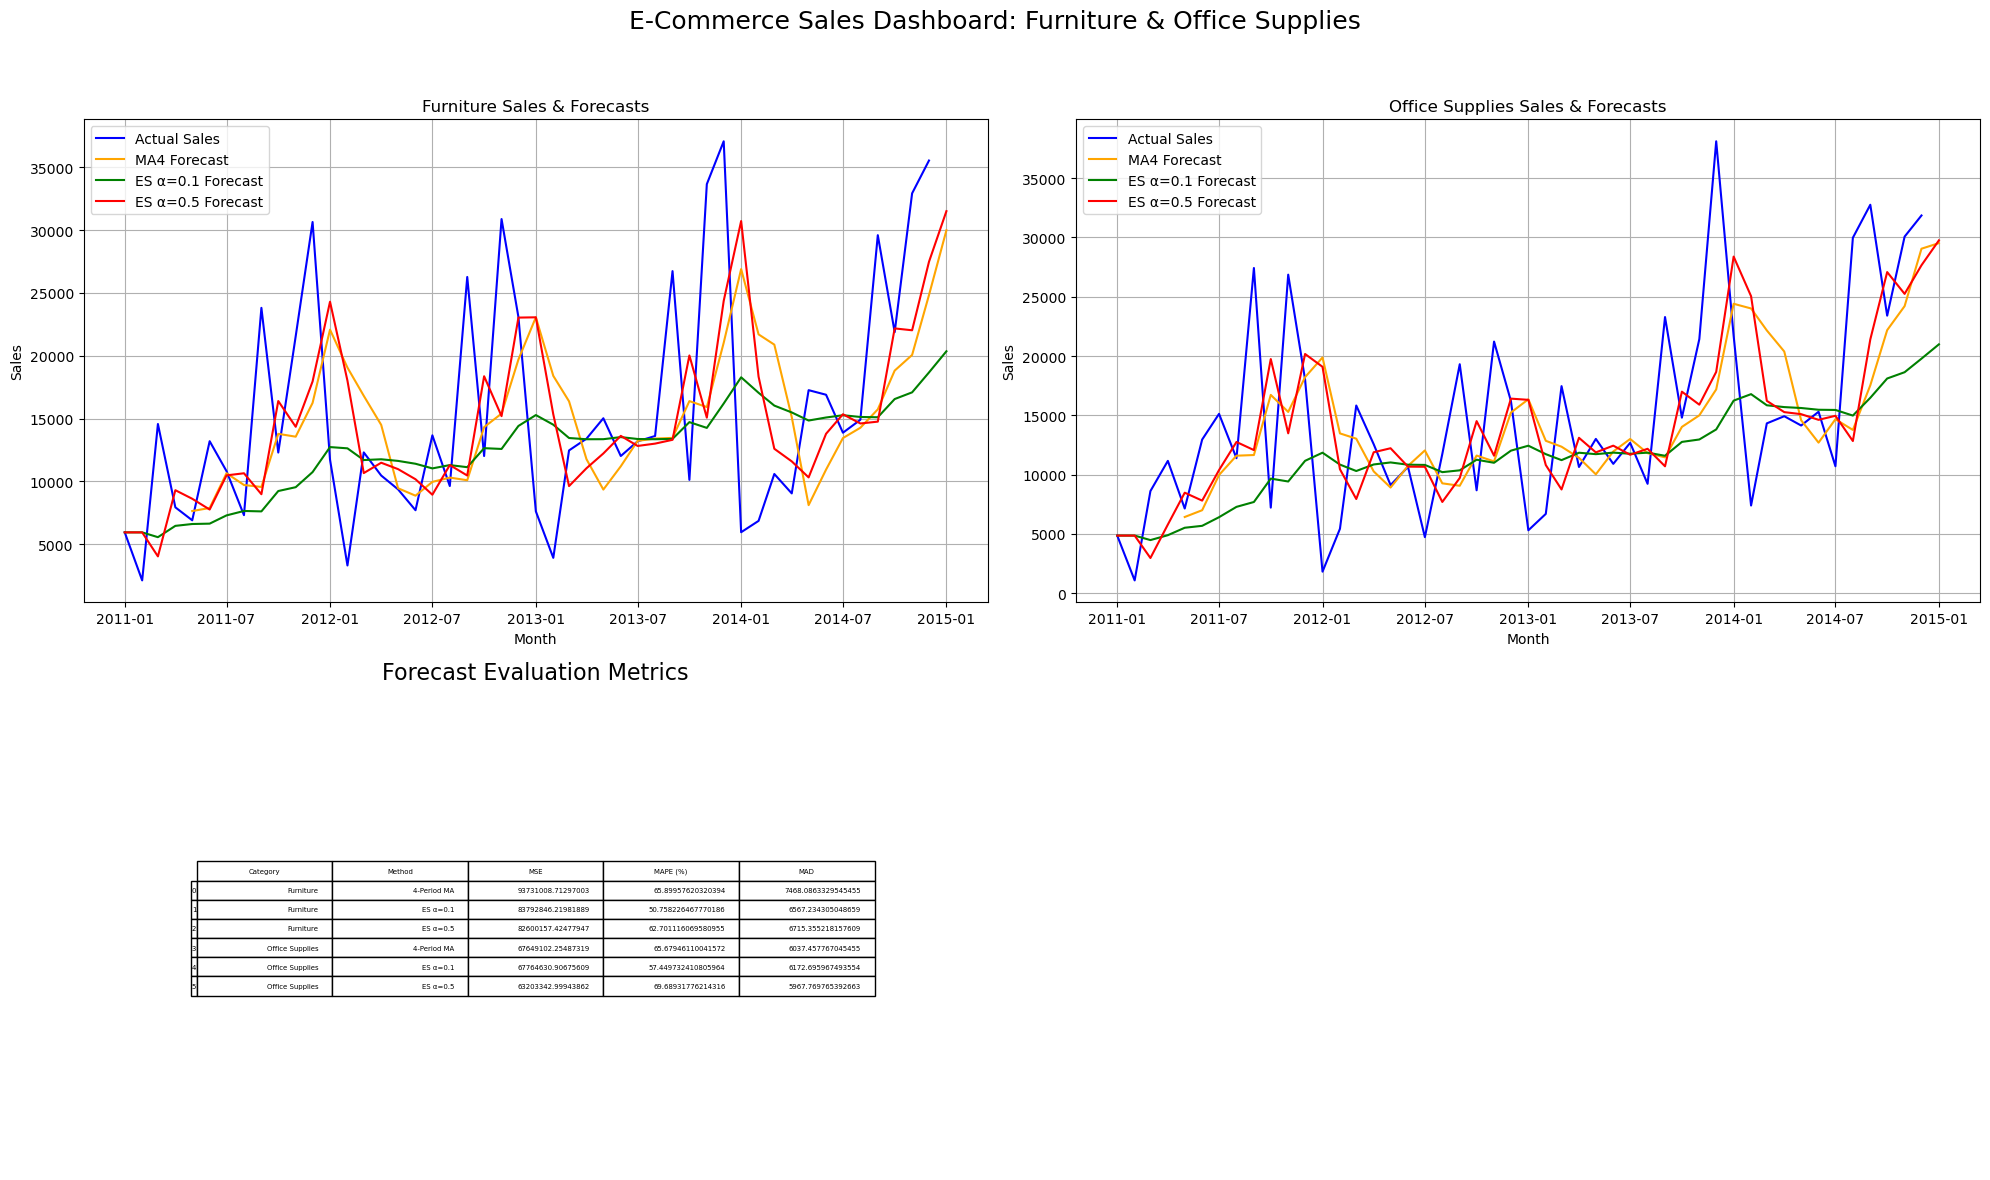

In [147]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle("E-Commerce Sales Dashboard: Furniture & Office Supplies", fontsize=18)

# --------------------------
# Furniture Sales & Forecasts
# --------------------------
axes[0, 0].plot(Furniture.index, Furniture.Sales, label='Actual Sales', color='blue')
axes[0, 0].plot(Furniture.index, Furniture.MA4, label='MA4 Forecast', color='orange')
axes[0, 0].plot(Furniture.index, Furniture.ES1, label='ES α=0.1 Forecast', color='green')
axes[0, 0].plot(Furniture.index, Furniture.ES5, label='ES α=0.5 Forecast', color='red')
axes[0, 0].set_title("Furniture Sales & Forecasts")
axes[0, 0].set_xlabel("Month")
axes[0, 0].set_ylabel("Sales")
axes[0, 0].legend()
axes[0, 0].grid(True)

# --------------------------
# Office Supplies Sales & Forecasts
# --------------------------
axes[0, 1].plot(Office.index, Office.Sales, label='Actual Sales', color='blue')
axes[0, 1].plot(Office.index, Office.MA4, label='MA4 Forecast', color='orange')
axes[0, 1].plot(Office.index, Office.ES1, label='ES α=0.1 Forecast', color='green')
axes[0, 1].plot(Office.index, Office.ES5, label='ES α=0.5 Forecast', color='red')
axes[0, 1].set_title("Office Supplies Sales & Forecasts")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Sales")
axes[0, 1].legend()
axes[0, 1].grid(True)

# --------------------------
# Forecast Metrics Table
# --------------------------
# Hide axis
axes[1, 0].axis('off')
axes[1, 1].axis('off')

# Display table in the bottom half (merged)
from pandas.plotting import table
table(axes[1, 0], forecast_summary_df, loc='center', colWidths=[0.15]*len(forecast_summary_df.columns))
axes[1, 0].set_title("Forecast Evaluation Metrics", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [148]:
# Copy the DataFrame to avoid modifying original
forecast_table = forecast_summary_df.copy()

# Function to find best (minimum MSE) per category
def highlight_best(row):
    best_method = row['MSE'].idxmin() if isinstance(row['MSE'], pd.Series) else None
    return ['background-color: lightgreen' if row.name == best_method else '' for _ in row]

# Alternatively, we can use Pandas Styler
def highlight_best_mse(df):
    def highlight(row):
        color = ['']*len(row)
        # Only highlight the MSE column
        if row['Category'] == 'Furniture':
            mse_values = df[df['Category']=='Furniture']['MSE']
        else:
            mse_values = df[df['Category']=='Office Supplies']['MSE']
        min_mse_idx = mse_values.idxmin()
        if row.name == min_mse_idx:
            color[df.columns.get_loc('MSE')] = 'background-color: lightgreen'
        return color
    return df.style.apply(highlight, axis=1)

# Display the styled table
highlight_best_mse(forecast_table)


,Category,Method,MSE,MAPE (%),MAD
0,Furniture,4-Period MA,93731008.712970,65.899576,7468.086333
1,Furniture,ES α=0.1,83792846.219819,50.758226,6567.234305
2,Furniture,ES α=0.5,82600157.424779,62.701116,6715.355218
3,Office Supplies,4-Period MA,67649102.254873,65.679461,6037.457767
4,Office Supplies,ES α=0.1,67764630.906756,57.449732,6172.695967
5,Office Supplies,ES α=0.5,63203342.999439,69.689318,5967.769765


## ✅ Conclusion

##### -Furniture and Office Supplies follow similar seasonal sales trends, peaking around year-end.

##### -Technology products emerge as the highest revenue-generating category.

##### -Forecasting shows upward sales momentum in the coming months, with expected spikes in Q4.

##### -The analysis provided a clean and structured dataset, which was used to build the Power BI Dashboard.

##### 📊 This completes Task 01: Business Sales Dashboard from E-Commerce Data.